Import libraries requred for the script

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from numpy.polynomial import polynomial as npp
from scipy.stats import linregress

Read the CSV files

In [2]:
filename = 'Dataset_BP2_v6'
df = pd.read_csv(filename + '.csv')


Check the columns in the data

In [20]:
df['MID_SPLICE_LAG1'].describe()

count    146904.000000
mean          6.732824
std           1.772235
min         -42.932030
25%           5.723300
50%           6.779583
75%           7.758776
max          42.304540
Name: MID_SPLICE_LAG1, dtype: float64

In [4]:
df.columns

Index(['RECID', 'CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'COMP_MACHINEID', 'COMP_POSITION_BIN',
       'LFT_SPLICE_LAG1', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
       'LFT_SPLICE_MA20', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'MID_SPLICE_LAG1', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_SLOPE5',
       'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20', 'RHT_SPLICE_LAG1',
       'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',
       'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20',
       'SPLICE_OK'],
      dtype='object')

Sort the data by timestamp

In [5]:
print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R', 'PRESSURE_S2_L',
                                       'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R', 'PRESSURE_S4_L',
                                       'PRESSURE_S4_R', 'COMP_POSITION_BIN', 
                                       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1','SPLICE_OK'])
print(df.shape)

print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R', 'PRESSURE_S2_L',
                                       'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R', 'PRESSURE_S4_L',
                                       'PRESSURE_S4_R', 'COMP_POSITION_BIN', 
                                       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1'])
# df = df.drop_duplicates()
print(df.shape)

(146918, 35)
(146904, 35)
(146904, 35)
(146904, 35)


In [6]:
# Duplicate rows grouped by a column, typically ID column
# pd.concat(g for _, g in df.groupby("SPLICE_OK") if len(g) > 1)

# df[ids.isin(ids[ids.duplicated()])].sort("ID")



Check missing data

In [7]:
df['CUT_LENGTH'] = pd.to_numeric(df['CUT_LENGTH'], errors='coerce')
df['CONV_TIME'] = pd.to_numeric(df['CONV_TIME'], errors='coerce')
df['LFT_SPLICE_LAG1'] = pd.to_numeric(df['LFT_SPLICE_LAG1'], errors='coerce')
df['MID_SPLICE_LAG1'] = pd.to_numeric(df['MID_SPLICE_LAG1'], errors='coerce')
df['RHT_SPLICE_LAG1'] = pd.to_numeric(df['RHT_SPLICE_LAG1'], errors='coerce')
df['COMP_POSITION_BIN'] = pd.to_numeric(df['COMP_POSITION_BIN'], errors='coerce')

df['PRESSURE_S1_L'] = pd.to_numeric(df['PRESSURE_S1_L'], errors='coerce')
df['PRESSURE_S2_L'] = pd.to_numeric(df['PRESSURE_S2_L'], errors='coerce')
df['PRESSURE_S3_L'] = pd.to_numeric(df['PRESSURE_S3_L'], errors='coerce')
df['PRESSURE_S4_L'] = pd.to_numeric(df['PRESSURE_S4_L'], errors='coerce')

df['PRESSURE_S1_R'] = pd.to_numeric(df['PRESSURE_S1_R'], errors='coerce')
df['PRESSURE_S2_R'] = pd.to_numeric(df['PRESSURE_S2_R'], errors='coerce')
df['PRESSURE_S3_R'] = pd.to_numeric(df['PRESSURE_S3_R'], errors='coerce')
df['PRESSURE_S4_R'] = pd.to_numeric(df['PRESSURE_S4_R'], errors='coerce')



In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()



                   Total  Percent
SPLICE_OK              0      0.0
PRESSURE_S3_R          0      0.0
LFT_SPLICE_MA5         0      0.0
LFT_SPLICE_LAG1        0      0.0
COMP_POSITION_BIN      0      0.0
COMP_MACHINEID         0      0.0
PRESSURE_S4_R          0      0.0
PRESSURE_S4_L          0      0.0
PRESSURE_S3_L          0      0.0
LFT_SPLICE_MA20        0      0.0


In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))


                    Total  Percent
SPLICE_OK               0      0.0
PRESSURE_S3_R           0      0.0
LFT_SPLICE_MA5          0      0.0
LFT_SPLICE_LAG1         0      0.0
COMP_POSITION_BIN       0      0.0
COMP_MACHINEID          0      0.0
PRESSURE_S4_R           0      0.0
PRESSURE_S4_L           0      0.0
PRESSURE_S3_L           0      0.0
LFT_SPLICE_MA20         0      0.0
PRESSURE_S2_R           0      0.0
PRESSURE_S2_L           0      0.0
PRESSURE_S1_R           0      0.0
PRESSURE_S1_L           0      0.0
CONV_TIME               0      0.0
CUT_LENGTH              0      0.0
LFT_SPLICE_MA10         0      0.0
LFT_SPLICE_SLOPE5       0      0.0
RHT_SPLICE_SLOPE20      0      0.0
MID_SPLICE_SLOPE20      0      0.0


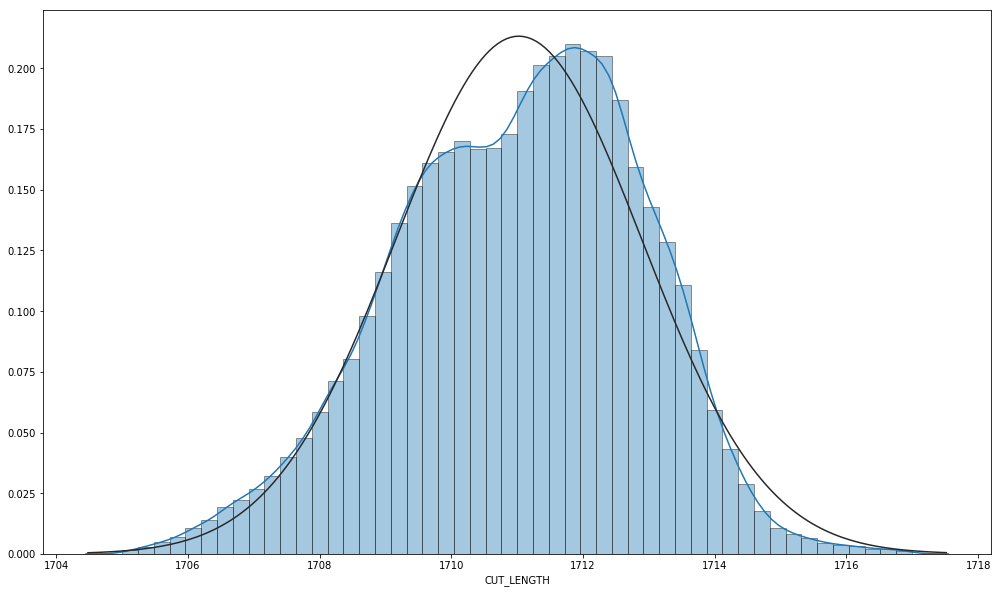

In [10]:
df.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
# df_mod = df
df_mod = df.drop(df[df['CUT_LENGTH'] < 1705].index)
df_mod = df_mod.drop(df[df['CUT_LENGTH'] > 1717].index)
#histogram and normal probability plot
fig = plt.figure(figsize=(17, 10))
sns.distplot(df_mod['CUT_LENGTH'], fit=norm,hist_kws=dict(edgecolor="k", linewidth=1));
# fig = plt.figure()
# res = stats.probplot(df['CUT_LENGTH'], plot=plt)

In [11]:
my_cols = ['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R',
       'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1', 'SPLICE_OK']

my_df = df[my_cols]
numeric_cols = my_df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

df_temp1 = my_df[my_df[numeric_cols].apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
df_temp2 = my_df[my_df['SPLICE_OK']==1]
# df_temp3 = df_temp2[df_temp2[['LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1', 'RHT_SPLICE_LAG1']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
print(df_temp1.shape)

Index(['CUT_LENGTH', 'CONV_TIME', 'PRESSURE_S1_L', 'PRESSURE_S1_R',
       'PRESSURE_S2_L', 'PRESSURE_S2_R', 'PRESSURE_S3_L', 'PRESSURE_S3_R',
       'PRESSURE_S4_L', 'PRESSURE_S4_R', 'LFT_SPLICE_LAG1', 'MID_SPLICE_LAG1',
       'RHT_SPLICE_LAG1', 'SPLICE_OK'],
      dtype='object')
(99819, 14)


In [12]:
df_low = my_df[my_df[numeric_cols].apply(lambda x: ((x - x.mean()) / x.std() >= -2) & ((x - x.mean()) / x.std() < 0)).all(axis=1)]
df_high = my_df[my_df[numeric_cols].apply(lambda x: ((x - x.mean()) / x.std() > 0) & ((x - x.mean()) / x.std() <= 2)).all(axis=1)]

In [13]:
df_low.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_high.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,1712.308966,192.743866,0.136667,0.136590,0.068889,0.075172,0.068851,0.073180,0.070958,0.073015,8.799884,8.446200,8.776582,1.0
std,0.965165,98.250239,0.020077,0.020406,0.017604,0.021440,0.017525,0.021381,0.017283,0.022574,1.042985,0.910225,0.999477,0.0
min,1711.039000,81.364000,0.110000,0.110000,0.050000,0.040000,0.050000,0.040000,0.050000,0.040000,7.132163,6.792092,7.211871,1.0
25%,1711.559000,116.252000,0.120000,0.120000,0.060000,0.050000,0.050000,0.050000,0.050000,0.050000,7.956883,7.641540,7.968228,1.0
50%,1712.052000,160.311000,0.130000,0.130000,0.060000,0.080000,0.070000,0.070000,0.070000,0.070000,8.694623,8.480225,8.682405,1.0
75%,1712.987000,246.475000,0.150000,0.150000,0.080000,0.100000,0.080000,0.100000,0.080000,0.100000,9.427999,9.209237,9.423345,1.0
max,1715.018000,502.156000,0.190000,0.190000,0.120000,0.100000,0.110000,0.100000,0.120000,0.107000,11.323840,10.261880,11.407330,1.0


In [15]:
my_df.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000,146904.000000
mean,1711.037756,80.763792,0.102164,0.101724,0.041846,0.036170,0.041348,0.035939,0.042449,0.036340,7.130981,6.732824,7.191449,0.848929
std,2.042285,218.629390,0.045854,0.045150,0.040373,0.036267,0.039201,0.034859,0.041500,0.036406,2.136332,1.772235,2.115005,0.358120
min,1609.587000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.507580,-42.932030,-48.073080,0.000000
25%,1709.710000,27.576000,0.080000,0.080000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,5.873409,5.723300,5.969117,1.000000
50%,1711.180000,34.101000,0.100000,0.100000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,7.152817,6.779583,7.230780,1.000000
75%,1712.404000,64.628500,0.120000,0.120000,0.060000,0.050000,0.060000,0.050000,0.060000,0.050000,8.391207,7.758776,8.479788,1.000000
max,1750.327000,10069.590000,2.000000,0.900000,0.700000,1.100000,0.400000,0.400000,0.500000,0.500000,45.129540,42.304540,36.336150,1.000000


In [16]:
df_temp1.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.000000,99819.0
mean,1710.992685,60.023998,0.101686,0.101709,0.035676,0.032397,0.035455,0.032496,0.036144,0.032697,7.252748,6.869523,7.353715,1.0
std,1.693094,71.568632,0.030051,0.030215,0.030565,0.029646,0.030586,0.029643,0.031109,0.030268,1.608919,1.339136,1.597717,0.0
min,1706.954000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.858741,3.190375,2.966377,1.0
25%,1709.706000,26.472000,0.090000,0.090000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,6.176315,5.962426,6.278132,1.0
50%,1711.095000,31.540000,0.100000,0.100000,0.030000,0.030000,0.030000,0.030000,0.030000,0.020000,7.253180,6.902928,7.417106,1.0
75%,1712.263000,54.202500,0.120000,0.120000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,8.375207,7.831938,8.478261,1.0
max,1715.122000,517.511000,0.190000,0.190000,0.120000,0.100000,0.110000,0.100000,0.120000,0.108000,11.403550,10.271050,11.420420,1.0


In [17]:
df_temp2.describe()

,CUT_LENGTH,CONV_TIME,PRESSURE_S1_L,PRESSURE_S1_R,PRESSURE_S2_L,PRESSURE_S2_R,PRESSURE_S3_L,PRESSURE_S3_R,PRESSURE_S4_L,PRESSURE_S4_R,LFT_SPLICE_LAG1,MID_SPLICE_LAG1,RHT_SPLICE_LAG1,SPLICE_OK
count,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.000000,124711.00000,124711.000000,124711.000000,124711.000000,124711.000000,124711.0
mean,1711.070001,76.913163,0.102642,0.102211,0.041313,0.035601,0.040802,0.035437,0.04189,0.035833,7.197066,6.803613,7.274168,1.0
std,1.919591,205.399396,0.044407,0.044212,0.039904,0.034948,0.038807,0.034146,0.04104,0.035783,1.898167,1.565708,1.884466,0.0
min,1613.364000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-22.522880,-24.160100,-23.901780,1.0
25%,1709.740000,27.251000,0.080000,0.080000,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,6.069043,5.857118,6.168679,1.0
50%,1711.215000,33.324000,0.100000,0.100000,0.030000,0.030000,0.030000,0.030000,0.03000,0.030000,7.227289,6.807220,7.328234,1.0
75%,1712.418000,61.251000,0.120000,0.120000,0.060000,0.050000,0.060000,0.050000,0.06000,0.050000,8.381316,7.816084,8.479643,1.0
max,1747.546000,10069.590000,0.500000,0.460000,0.700000,1.100000,0.400000,0.400000,0.50000,0.500000,30.683690,37.143270,28.695630,1.0


In [18]:
# df_temp3.describe()

In [19]:
#df.head
df.to_csv(filename + '_mod01.csv', header=True, index=False, float_format='%.5f')
